In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.notebook import tqdm

def get_user_info(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    users = []
    for user_row in soup.find_all('td', colspan='2'):
        user_data = {}

        try:
          age_gender_tag = user_row.find('img', src=lambda x: x and ('male.gif' in x or 'female.gif' in x))
          if age_gender_tag:
              user_data['gender'] = 'female' if 'female.gif' in age_gender_tag['src'] else 'male'
        except ValueError as e:
          user_data['gender'] = 'unknown'

        if age_gender_tag:
            if age_gender_tag.next_sibling:
                age_text = age_gender_tag.next_sibling.text.strip().replace('(', '').replace(')', '')
                if 'лет' in age_text:
                    user_data['age'] = int(age_text.split()[0])

        if 'gender' in user_data and 'age' in user_data:
            users.append(user_data)
    return users

base_url = "http://fantlab.ru/usersclasspage"
page_count = 2490

all_users = []
for page in tqdm(range(1, page_count + 1), desc="Парсинг страниц"):
    url = f"{base_url}{page}"
    users = get_user_info(url)
    all_users.extend(users)

df = pd.DataFrame(all_users)
df



Парсинг страниц:   0%|          | 0/2490 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
import pandas as pd
df = pd.read_csv('/content/output.csv')

df_clean_age = df[df['age'] < 90]

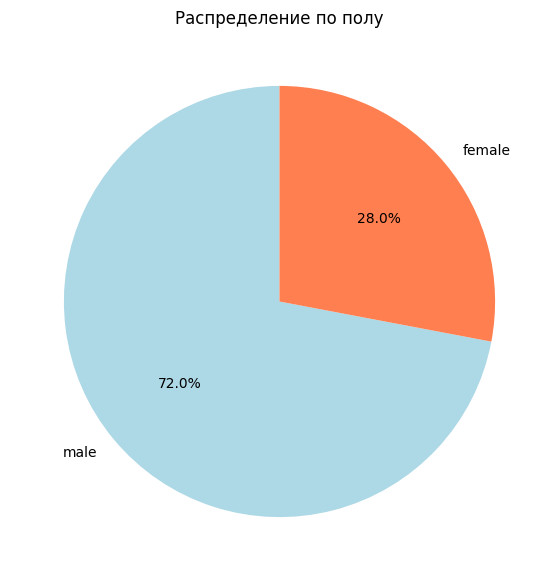

In [9]:
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()
plt.figure(figsize=(7, 7))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'coral'])
plt.title('Распределение по полу')
plt.ylabel('')
plt.show()

In [10]:
average_age_by_gender = df_clean_age.groupby('gender')['age'].mean()
print(average_age_by_gender)

gender
female    38.383284
male      41.509701
Name: age, dtype: float64


<ipython-input-11-921d5c194c5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_age['age_group'] = (df['age'] // 10) * 10


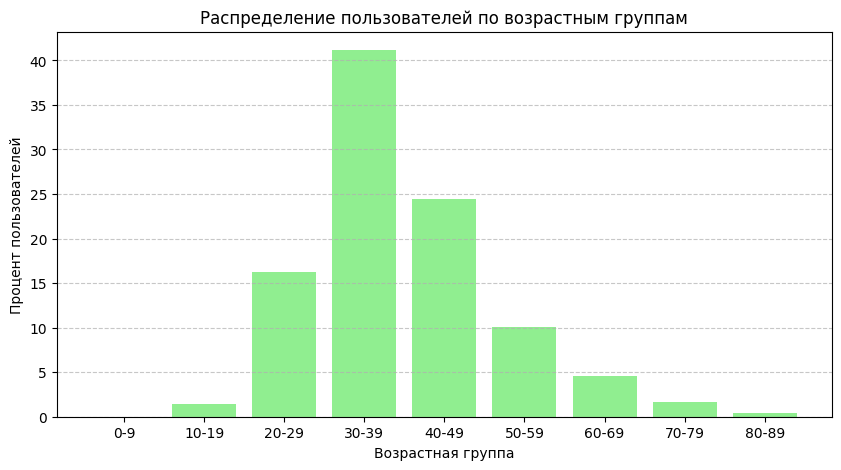

In [11]:
df_clean_age['age_group'] = (df['age'] // 10) * 10

age_distribution = df_clean_age['age_group'].value_counts().sort_index()

age_distribution = (age_distribution / age_distribution.sum()) * 100

plt.figure(figsize=(10, 5))
plt.bar(age_distribution.index.astype(str) + '-' + (age_distribution.index + 9).astype(str),
        age_distribution, color='lightgreen')

plt.xlabel('Возрастная группа')
plt.ylabel('Процент пользователей')
plt.title('Распределение пользователей по возрастным группам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-13-e568d2bab3d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['age_group'] = (df_female['age'] // 10) * 10


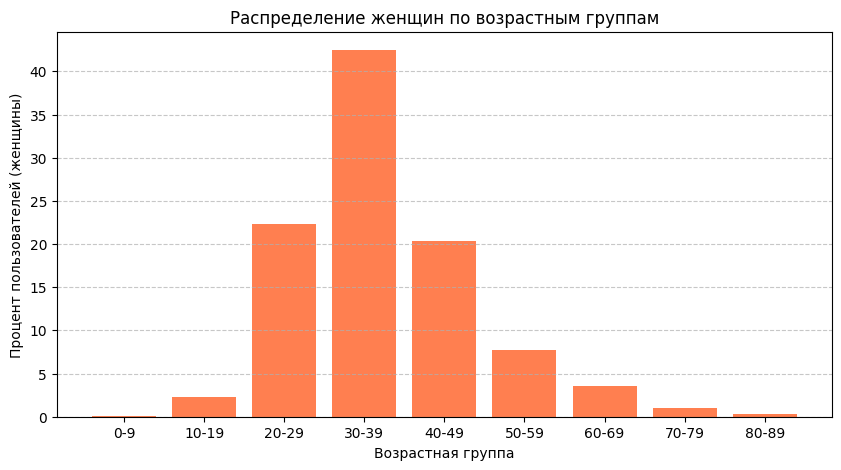

In [13]:
df_female = df_clean_age[df_clean_age['gender'] == 'female']

df_female['age_group'] = (df_female['age'] // 10) * 10

age_distribution = df_female['age_group'].value_counts().sort_index()

age_distribution = (age_distribution / age_distribution.sum()) * 100

plt.figure(figsize=(10, 5))
plt.bar(age_distribution.index.astype(str) + '-' + (age_distribution.index + 9).astype(str),
        age_distribution, color='coral')

plt.xlabel('Возрастная группа')
plt.ylabel('Процент пользователей (женщины)')
plt.title('Распределение женщин по возрастным группам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-15-dcbb09085c59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['age_group'] = (df_male['age'] // 10) * 10


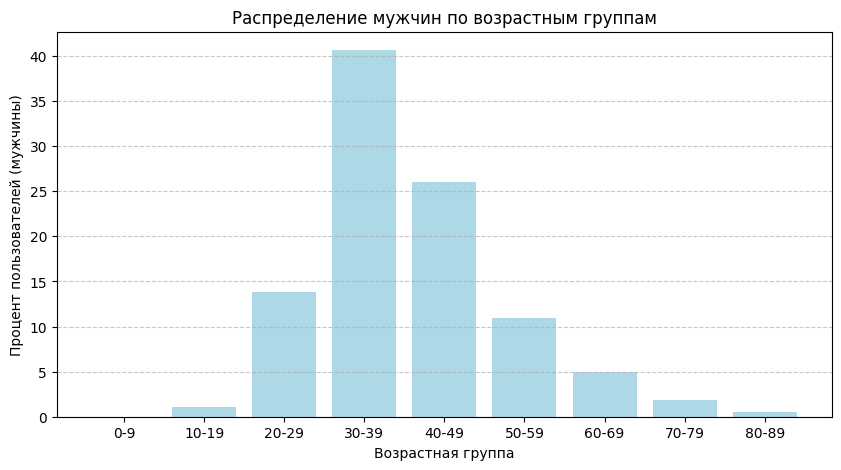

In [15]:
df_male = df_clean_age[df_clean_age['gender'] == 'male']

df_male['age_group'] = (df_male['age'] // 10) * 10

age_distribution = df_male['age_group'].value_counts().sort_index()

age_distribution = (age_distribution / age_distribution.sum()) * 100

plt.figure(figsize=(10, 5))
plt.bar(age_distribution.index.astype(str) + '-' + (age_distribution.index + 9).astype(str),
        age_distribution, color='lightblue')

plt.xlabel('Возрастная группа')
plt.ylabel('Процент пользователей (мужчины)')
plt.title('Распределение мужчин по возрастным группам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()